In [ ]:
import numpy as np
import pandas as pd
import csv
import math
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
import scipy
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def read_data_with_fields(filename,fields):
    df = pd.read_csv(filename,usecols = fields)
    return df

In [ ]:
filename = 'Reduced_data_district_2.csv'
fields =['FEMALE_LIT','Percent_schools_with_boys_toilet','Percent_schools_with_playground',\
        'Percent_schools_with_drinking_water','Percent_schools_with_electricity','Percent_schools_with_Roads', 'Percent_single_teacher_schools']
df= read_data_with_fields(filename,fields)
# df = df[df.P_Enrollment_Rate.notnull()]
# df.P_Enrollment_Rate = pd.to_numeric(df.P_Enrollment_Rate, errors='coerce')
df = df.dropna()

In [ ]:
y = df[fields[0]].values
X = df[fields[1:7]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
sc= MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
kf = list(KFold(n_splits=5).split(X_train,y_train))

In [ ]:
#SVR

In [ ]:
C_range = [0.001, 0.01, 0.1, 1, 5, 10]
gamma_range = [0.001, 0.01, 0.1, 1, 5, 10]
kernel_range = ["rbf"]

param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)

grid = GridSearchCV(SVR(), param_grid=param_grid, cv=kf, n_jobs=1, verbose=1)
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are {'C': 10, 'gamma': 5, 'kernel': 'rbf'} with a score of 0.37


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    2.7s finished


In [ ]:
reg_svr = SVR(C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
reg_svr.fit(X_train, y_train)
y_pred = reg_svr.predict(X_test)
print('correlation:', pearsonr(y_test, y_pred))

correlation: (0.5185424044943868, 3.6172152483754115e-10)


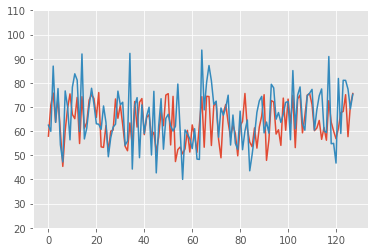

In [ ]:
import matplotlib.pyplot as plt
plt.ylim(20, 110)
# plt.xlim(60, 110)

plt.plot(reg_svr.predict(X_test))
plt.plot(y_test)

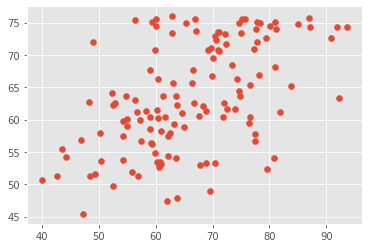

In [ ]:
plt.scatter(y_test,reg_svr.predict(X_test))

In [ ]:
print('correlation:', pearsonr(y_test, y_pred))

correlation: (0.5185424044943868, 3.6172152483754115e-10)


In [ ]:
my_xvector =  np.array([65,60,96,57,87,7]).reshape(1, -1);
my_xvector = sc.fit_transform(my_xvector)
y_out = reg_svr.predict(my_xvector)
y_out

array([63.55572727])

In [ ]:
#Random Forest

In [ ]:
param_grid = {'n_estimators': [500, 700, 1000], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [2, 3]}
grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=kf, n_jobs=1, verbose=1)
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.8min finished


The best parameters are {'max_depth': None, 'min_samples_split': 3, 'n_estimators': 1000} with a score of 0.41


In [ ]:
clf = RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'], max_depth=grid.best_params_['max_depth'], min_samples_split=grid.best_params_['min_samples_split'])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('correlation:', pearsonr(y_test, y_pred))

correlation: (0.5889033623185579, 2.6441337537077483e-13)


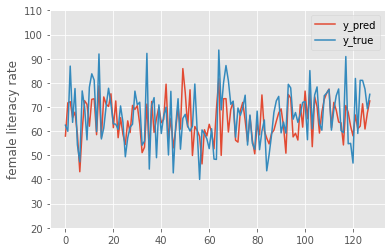

In [ ]:
import matplotlib.pyplot as plt
plt.ylim(20, 110)
# plt.xlim(60, 110)

plt.plot(clf.predict(X_test))
plt.plot(y_test)
plt.ylabel('female literacy rate')
labels = ['y_pred','y_true']
plt.legend(labels)


Text(0.5, 0, 'y_true')

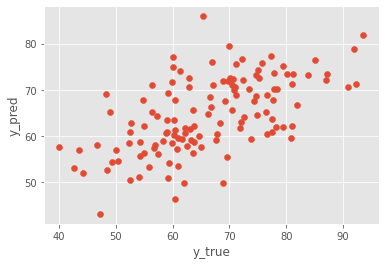

In [ ]:
plt.scatter(y_test,clf.predict(X_test))
plt.ylabel('y_pred')
plt.xlabel('y_true')

In [ ]:
my_xvector =  np.array([65,60,96,57,87,7]).reshape(1, -1);
my_xvector = sc.fit_transform(my_xvector)

y_out = clf.predict(my_xvector)
y_out

array([67.43088962])

In [ ]:
from sklearn.metrics import r2_score
print('R2 score:',r2_score(y_test, y_pred))

R2 score: 0.1660848075213317
